Import packages

In [98]:
import pyabf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import norm


load abf file

In [ ]:
abf = pyabf.ABF('/Users/Haley/Desktop/Neuroscience Lab/sandeeps data/cell1/2012_08_01_0005.abf')

The abf files contain sweeps in forms of numpy arrays

In [102]:
abf.setSweep(sweepNumber=0, channel=0)
print("data:",abf.sweepY)
print("time:",abf.sweepX)
print("length of arrays:",len(abf.sweepX))
print("channel count:",abf.channelCount)

data: [-35.0342 -34.5459 -34.79   ...  -3.418   -3.0518  -3.418 ]
time: [ 0.  0.  0. ... 10. 10. 10.]
length of arrays: 1000000
channel count: 4


In [ ]:
abf.sweepY[,]
timeinseconds*10/1000000

Calculate the mean and standard deviation

In [103]:
def get_std_range_percentage(array, percentage=95):
    """
    Returns the lower and upper bounds of a region centered at the mean
    that contains the given percentage of the data, assuming a normal distribution.

    Returns:
    - (lower_bound, upper_bound)
    """
    mean = np.mean(array)
    std = np.std(array)
    
    # Convert percentage to a z-score range (e.g., 95% ~ 1.96 std dev)
    z = norm.ppf(0.5 + (percentage / 200))  # ppf is the inverse CDF

    lower = mean - z * std
    upper = mean + z * std
    return lower, upper


(np.float64(-73.58157839193731), np.float64(39.34769167318732))

In [112]:
def get_std_range(array, stdnum=8):
    """
    Returns the lower and upper bounds of a region centered at the mean
    that contains the given percentage of the data, assuming a normal distribution.

    Returns:
    - (lower_bound, upper_bound)
    """
    mean = np.mean(array)
    std = np.std(array)

    lower = mean - stdnum * std
    upper = mean + stdnum * std
    return lower, upper



list

Funtion that plots motor neuron activity given an abf file

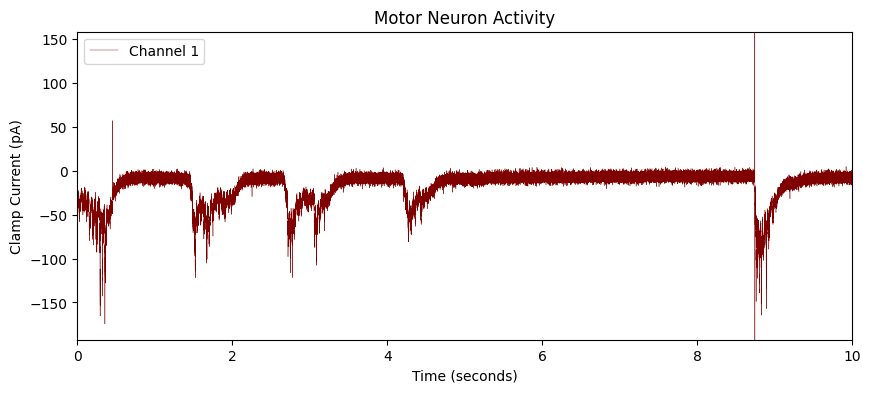

In [114]:
def plot_motorneuron_activity(abf):
    fig = plt.figure(figsize=(10, 4))
    # plot the first channel
    abf.setSweep(sweepNumber=0, channel=0)
    plt.plot(abf.sweepX, abf.sweepY, label="Channel 1",linewidth = 0.3,color='maroon')
    y_min, y_max = get_std_range(abf.sweepY)

    # decorate the plot
    plt.title("Motor Neuron Activity")
    plt.ylabel(abf.sweepLabelY)
    plt.xlabel(abf.sweepLabelX)
    plt.axis([0, 10, y_min, y_max]) # x bound, y bound
    plt.legend()
    plt.show()

plot_motorneuron_activity(abf)

Function that plots ventral root bursts given abf file

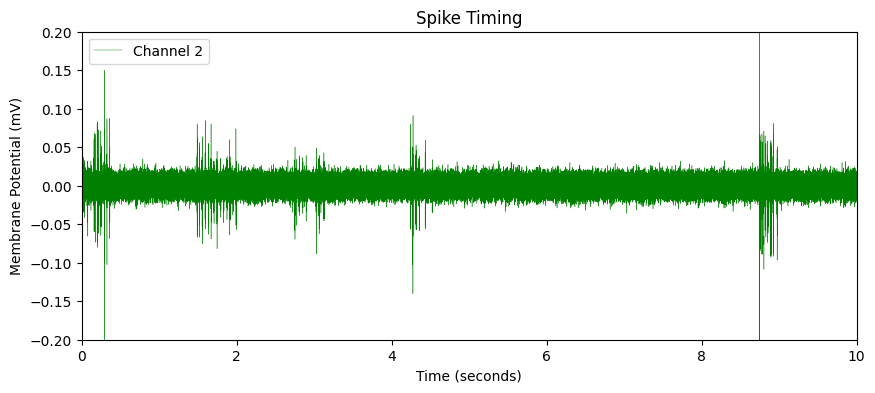

In [73]:
def plot_ventralroot_bursts(abf):   
    fig = plt.figure(figsize=(10, 4))

    # plot the second channel
    abf.setSweep(sweepNumber=0, channel=1)
    plt.plot(abf.sweepX, abf.sweepY, label="Channel 2",linewidth = 0.3,color='green')

    # decorate the plot
    plt.title("Spike Timing")
    plt.ylabel(abf.sweepLabelY)
    plt.xlabel(abf.sweepLabelX)
    plt.axis([0, 10, -0.2, 0.2]) # x bound, y bound
    plt.legend()
    plt.show()
plot_ventralroot_bursts(abf)

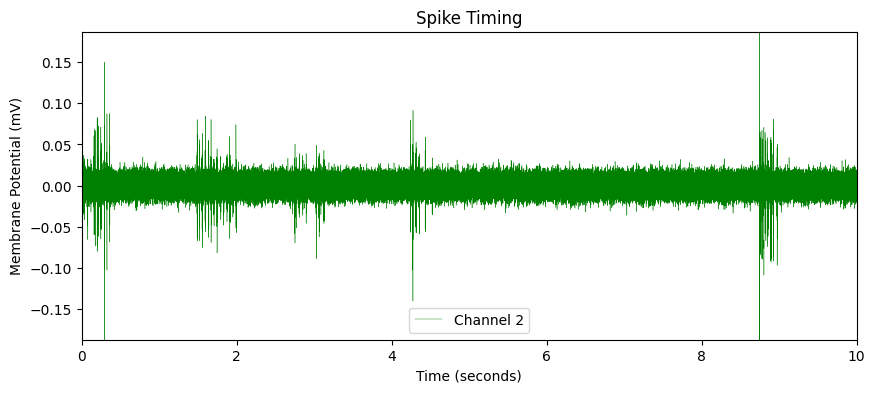

In [118]:
def plot_ventralroot_bursts2(abf):   
    fig = plt.figure(figsize=(10, 4))

    # plot the second channel
    abf.setSweep(sweepNumber=0, channel=1)
    plt.plot(abf.sweepX, abf.sweepY, label="Channel 2",linewidth = 0.3,color='green')
    y_min, y_max = get_std_range(abf.sweepY,20)

    # decorate the plot
    plt.title("Spike Timing")
    plt.ylabel(abf.sweepLabelY)
    plt.xlabel(abf.sweepLabelX)
    plt.axis([0, 10, y_min, y_max]) # x bound, y bound
    plt.legend()
    plt.show()
plot_ventralroot_bursts2(abf)

ANNOTATIONS FILE: load csv as a pandas data frame

In [46]:
annotations = pd.read_csv('/Users/Haley/Desktop/Neuroscience Lab/sandeeps data/cell1/2012_08_01_0005.csv')
annotations


,Trace name,ID,On time,Freq,Tags
0,2012_08_01_0005,1,1488.65,NaN,bout start; spontaneous
1,2012_08_01_0005,2,1518.00,34.0716,NaN
2,2012_08_01_0005,3,1552.50,28.9855,NaN
3,2012_08_01_0005,4,1591.26,25.7998,NaN
4,2012_08_01_0005,5,1633.37,23.7473,NaN
5,2012_08_01_0005,6,1667.08,29.6648,NaN
6,2012_08_01_0005,7,1704.54,26.6951,NaN
7,2012_08_01_0005,8,1744.06,25.3036,NaN
8,2012_08_01_0005,9,1793.31,20.3046,bout end
9,2012_08_01_0005,10,4239.18,0.4089,bout start; spontaneous


Make new column in data frame in units of seconds

In [174]:
annotations["Seconds"] = annotations['On time']*0.001
annotations.loc[0:1,"Seconds"]

t_0 = annotations.loc[0,"Seconds"] 
t_f = annotations.loc[1,"Seconds"]
annotations
print(np.searchsorted(abf.sweepX, t_0))
print(np.searchsorted(abf.sweepX, t_f))

148865
151800


In [144]:
def add_seconds(df):
    '''
    Function that takes in df with milisecond time stamps and adds a column with seconds time stamps
    '''
    df["Seconds"] = df['On time']*0.001
    return df


Function that plots a channel of abf file given time bounds and channel

/var/folders/mw/pz4gm95j6zb7syl48vm11wrw0000gn/T/ipykernel_2793/3604447813.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


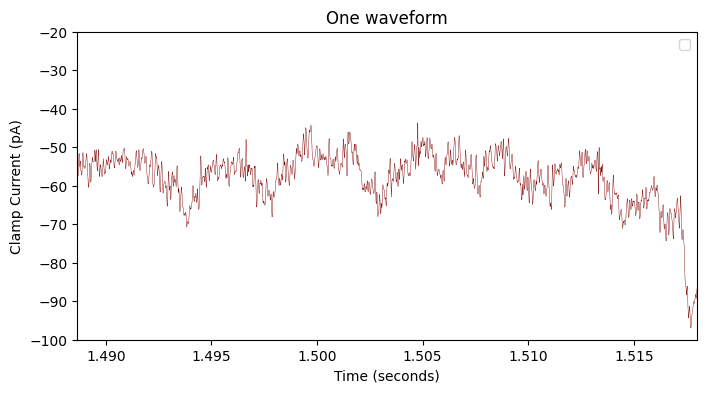

In [145]:
def plot_one_waveform(abf,t_0,t_f,ch=0):
    '''
    Funtion plots motor activity of abf file given time bound and channel
    '''    
    fig = plt.figure(figsize=(8, 4))
    # plot the first channel
    abf.setSweep(sweepNumber=0, channel=ch)
    plt.plot(abf.sweepX, abf.sweepY,linewidth = 0.3,color='maroon')

    # decorate the plot
    plt.title("One waveform")
    plt.ylabel(abf.sweepLabelY)
    plt.xlabel(abf.sweepLabelX)
    plt.axis([t_0,t_f,-100, -20]) # x bound, y bound
    plt.legend()
    plt.show()
plot_one_waveform(abf,t_0,t_f)   

Y axis adjuster

/var/folders/mw/pz4gm95j6zb7syl48vm11wrw0000gn/T/ipykernel_2793/114400010.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


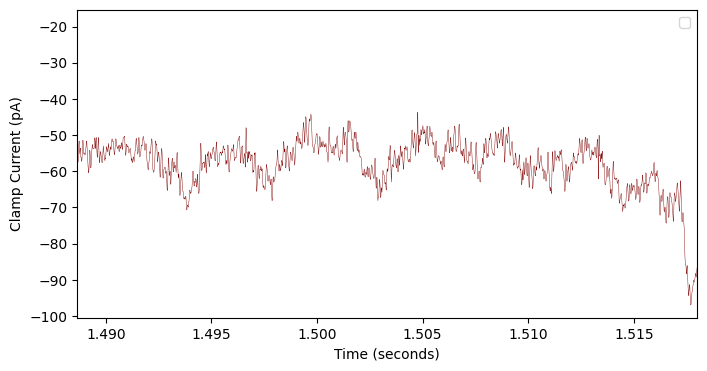

In [186]:
def plot_one_waveform(abf,t_0,t_f,ch=0,title=None):
    '''
    Function plots motor activity of abf file given time bound and channel
    '''    
    fig = plt.figure(figsize=(8, 4))
    abf.setSweep(sweepNumber=0, channel=ch)
    plt.plot(abf.sweepX, abf.sweepY,linewidth = 0.3,color='maroon')
    y_idx_start = np.searchsorted(abf.sweepX, t_0)
    y_idx_end = np.searchsorted(abf.sweepX, t_f)
    y_min, y_max = get_std_range(abf.sweepY[y_idx_start:y_idx_end],6)

    plt.title(title)
    plt.ylabel(abf.sweepLabelY)
    plt.xlabel(abf.sweepLabelX)
    plt.axis([t_0,t_f,y_min, y_max]) # x bound, y bound
    plt.legend()
    plt.show()
plot_one_waveform(abf,t_0,t_f)   

Final plot_one_waveform function

In [202]:
def plot_one_waveform(abf, t_0, t_f, ch=0, title=None, freq=None):
    '''
    Function plots motor activity of abf file given time bound and channel,
    and adds a secondary x-axis representing phase from 0 to 1.
    '''    
    fig, ax = plt.subplots(figsize=(8, 4))
    abf.setSweep(sweepNumber=0, channel=ch)
    ax.plot(abf.sweepX, abf.sweepY, linewidth=0.3, color='maroon', label='Motoneuron Activity')

    # Index range for y-axis scaling
    y_idx_start = np.searchsorted(abf.sweepX, t_0)
    y_idx_end = np.searchsorted(abf.sweepX, t_f)
    y_min, y_max = get_std_range(abf.sweepY[y_idx_start:y_idx_end], 6)

    # Main plot
    
    # Add frequency to title
    full_title = title if title else "One waveform"
    if freq is not None:
        full_title += f"\nFrequency: {freq:.2f} Hz"
    ax.set_title(full_title)

    # ax.set_title(title)
    ax.set_ylabel(abf.sweepLabelY)
    ax.set_xlabel(abf.sweepLabelX)
    ax.set_xlim([t_0, t_f])
    ax.set_ylim([y_min, y_max])
    ax.legend()

    # Add a secondary x-axis for phase (0 to 1)
    def time_to_phase(x): return (x - t_0) / (t_f - t_0)
    def phase_to_time(x): return x * (t_f - t_0) + t_0

    secax = ax.secondary_xaxis('top', functions=(time_to_phase, phase_to_time))
    secax.set_xlabel('Phase (0 to 1)')
    secax.set_xlim([0, 1])

    plt.tight_layout()
    plt.show()


TypeError: unsupported format string passed to NoneType.__format__

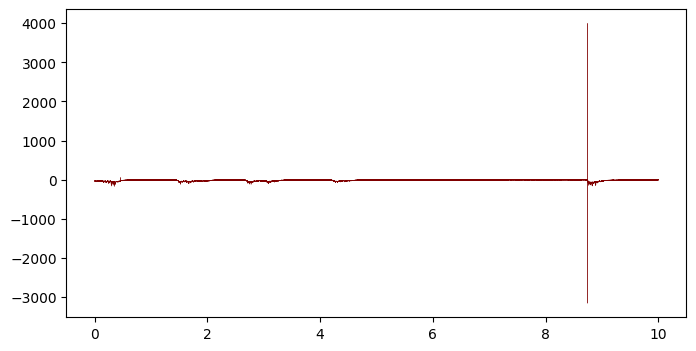

In [203]:
plot_one_waveform(abf,t_0,t_f)   

In [151]:
# # Load burst timing data from CSV
# df = pd.read_csv(csv_path)
# abf = pyabf.ABF(abf_path)

In [148]:
annotations["Seconds"] = annotations['On time']*0.001
annotations.loc[0:1,"Seconds"]

0    1.48865
1    1.51800
Name: Seconds, dtype: float64

In [150]:
df = pd.read_csv('/Users/Haley/Desktop/Neuroscience Lab/sandeeps data/cell1/2012_08_01_0005.csv')

In [139]:
def add_seconds(df):
    '''
    Function that takes in df with milisecond time stamps and adds a column with seconds time stamps
    '''
    df["Seconds"] = df['On time']*0.001
    return df


In [166]:
df

,Trace name,ID,On time,Freq,Tags,Seconds
0,2012_08_01_0005,1,1488.65,NaN,bout start; spontaneous,1.48865
1,2012_08_01_0005,2,1518.00,34.0716,NaN,1.51800
2,2012_08_01_0005,3,1552.50,28.9855,NaN,1.55250
3,2012_08_01_0005,4,1591.26,25.7998,NaN,1.59126
4,2012_08_01_0005,5,1633.37,23.7473,NaN,1.63337
5,2012_08_01_0005,6,1667.08,29.6648,NaN,1.66708
6,2012_08_01_0005,7,1704.54,26.6951,NaN,1.70454
7,2012_08_01_0005,8,1744.06,25.3036,NaN,1.74406
8,2012_08_01_0005,9,1793.31,20.3046,bout end,1.79331
9,2012_08_01_0005,10,4239.18,0.4089,bout start; spontaneous,4.23918


In [188]:
def plot_waveforms(df, abf,ch=0):
    df = add_seconds(df)
    for i in range(len(df) - 1):
        t_0 = df.loc[i, 'Seconds']
        t_f = df.loc[i + 1, 'Seconds']
        # if df.loc[i,"Tags"].str.contains('start'):
        #     if df.loc[i,"Tags"].str.contains('spontaneous'):
        #         label = 'First Waveform Spontaneous Start'
        #     if df.loc[i,"Tags"].str.contains('shock'):
        #         label = 'First Waveform Shock Start'
        # elif df.loc[i+1,"Tags"].str.contains('end'):
        #     label = f'Last Waveform in event ({i} total)'
        # elif df.loc[i,"Tags"].str.contains('end'):
        #     label = 'Break between swims'            
        # else:
        #     label=f'{i}th Waveform in event'

    plot_one_waveform(abf,t_0,t_f,ch=ch)   

plot_waveforms(df, abf,ch=0)



AttributeError: 'str' object has no attribute 'str'

Final plot waveforms function:

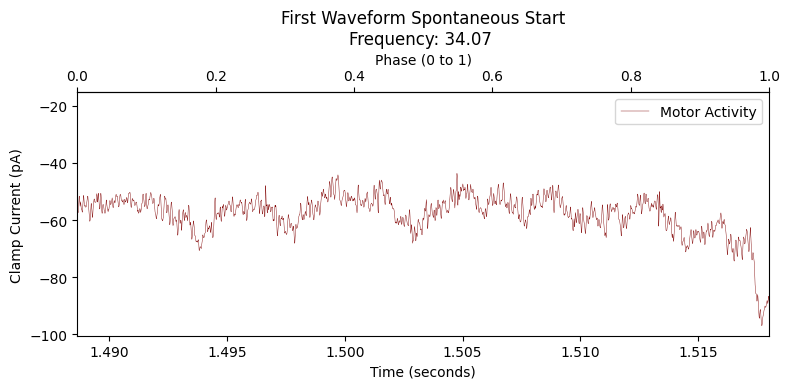

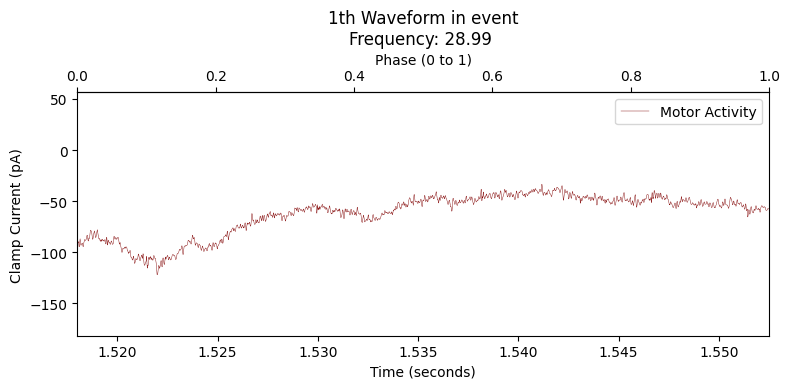

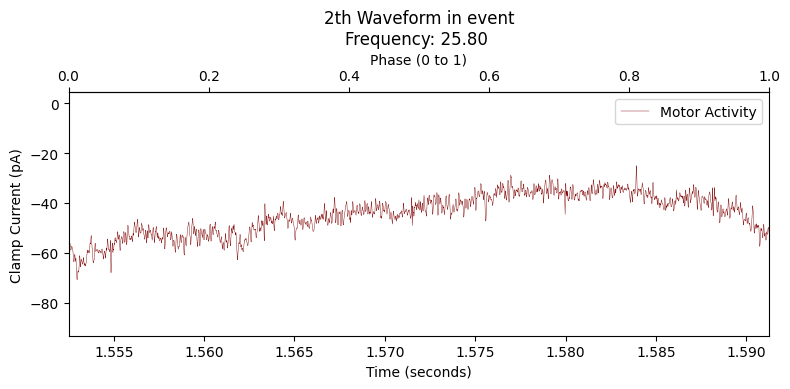

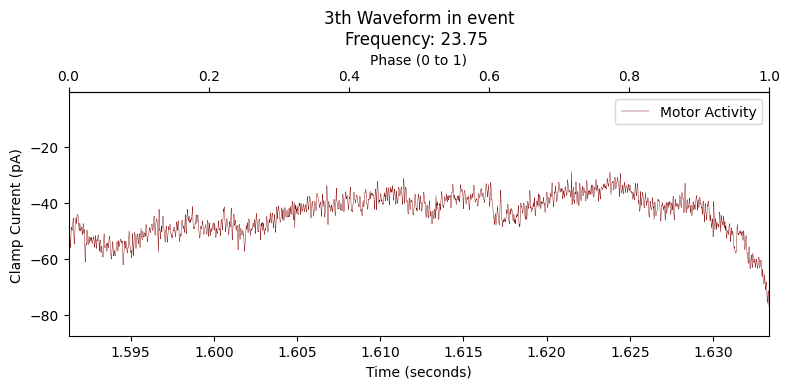

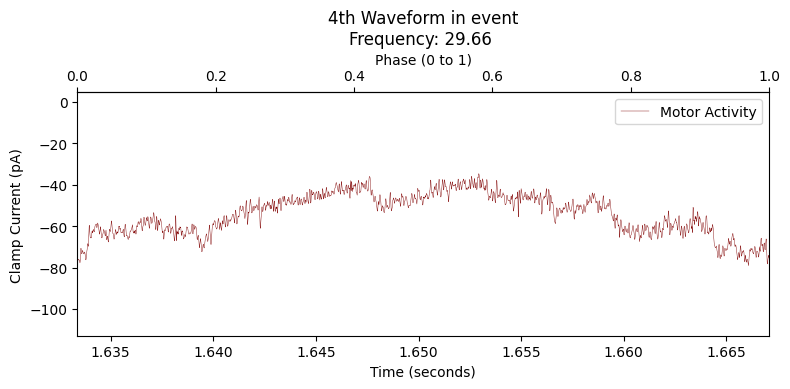

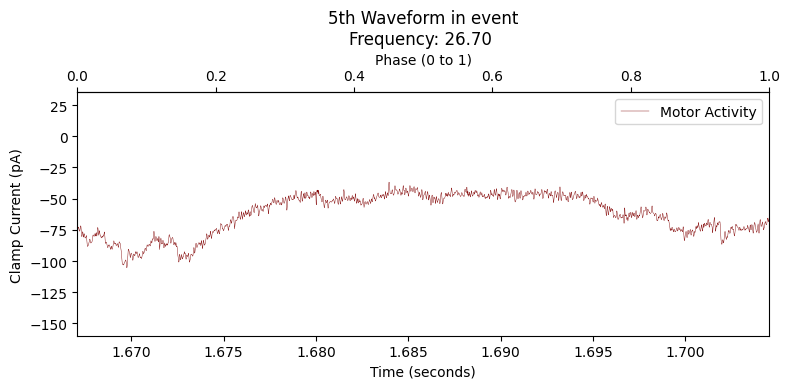

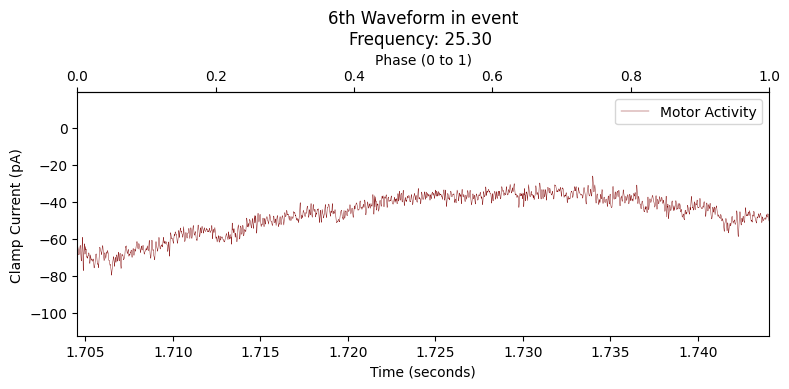

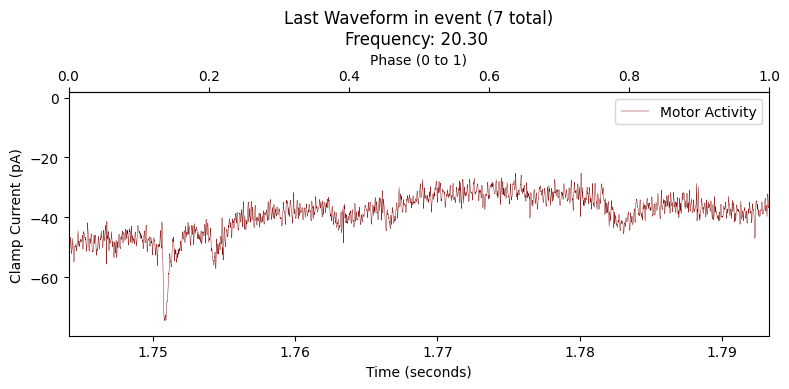

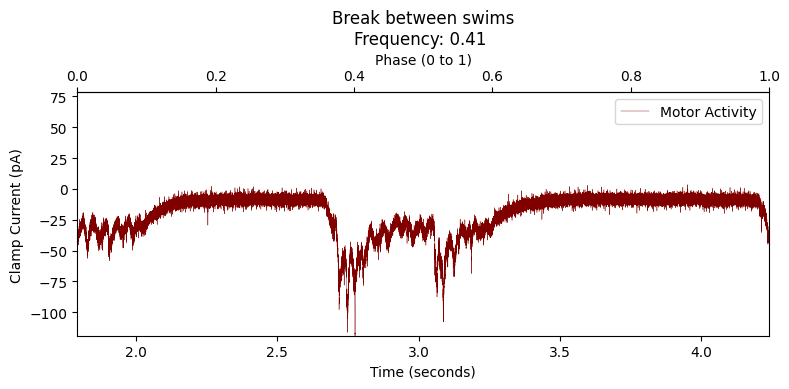

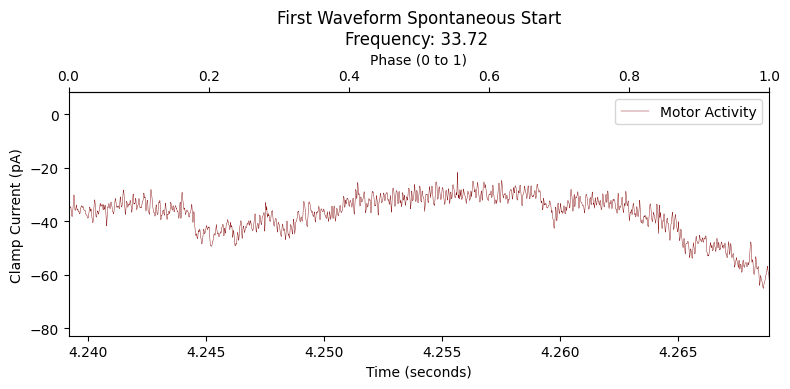

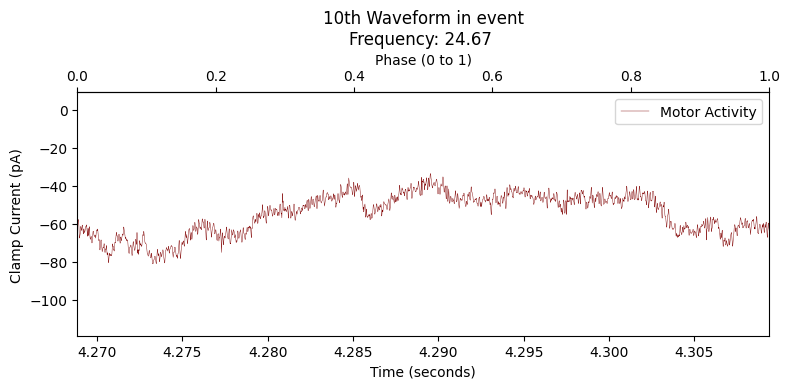

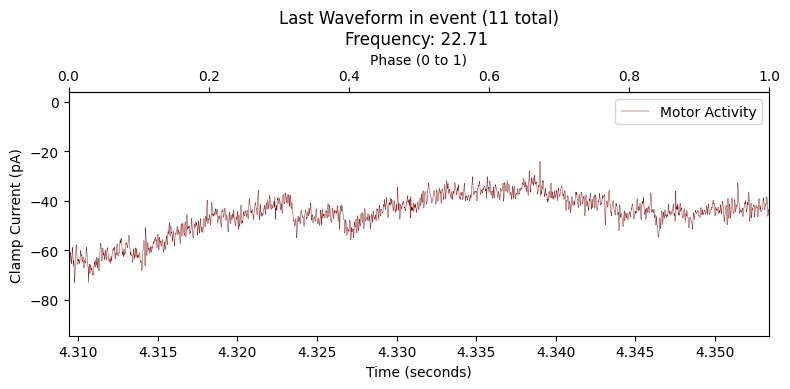

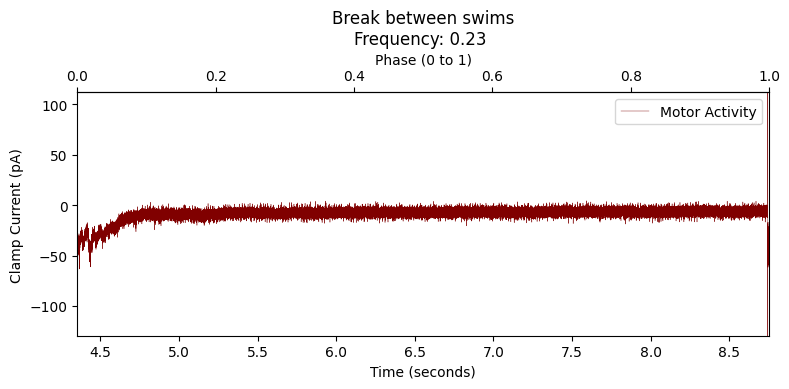

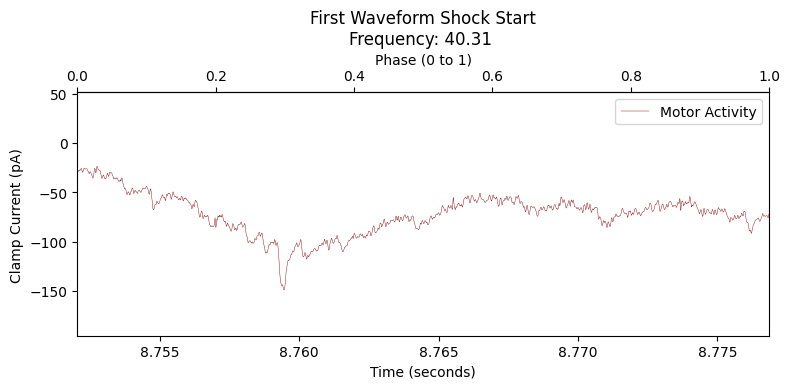

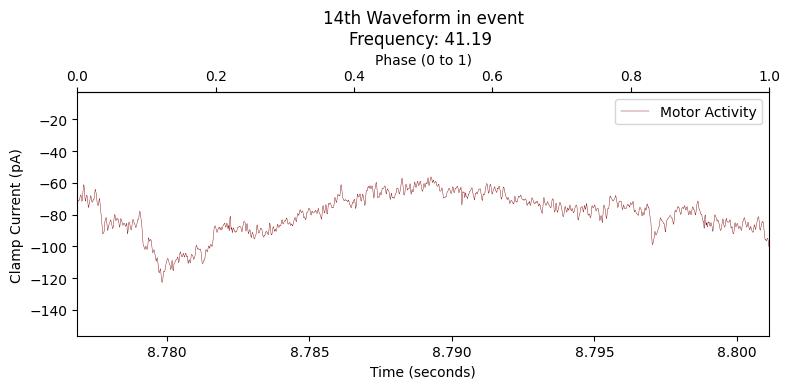

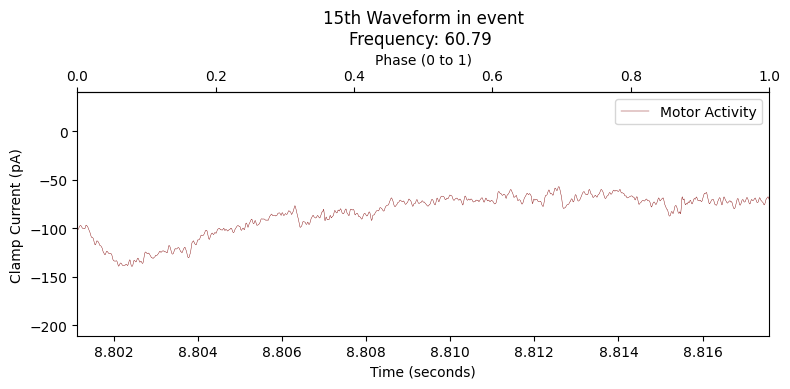

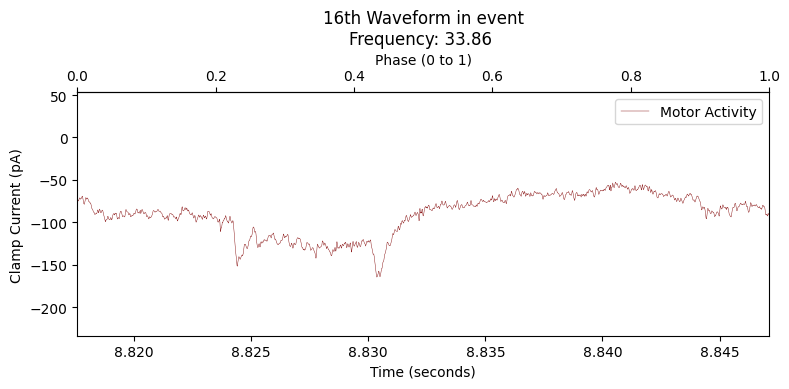

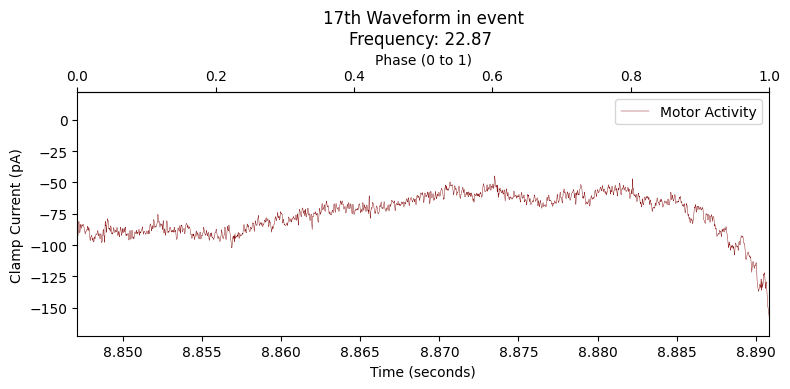

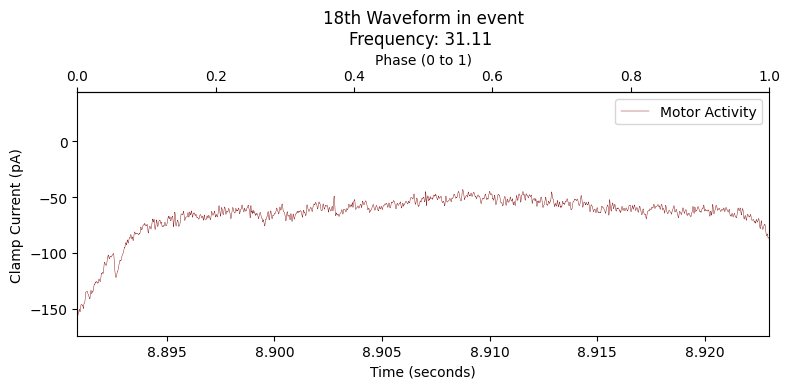

In [198]:
def plot_waveforms(df, abf, ch=0):
    df = add_seconds(df)
    for i in range(len(df) - 1):
        t_0 = df.loc[i, 'Seconds']
        t_f = df.loc[i + 1, 'Seconds']
        freq = df.loc[i + 1, "Freq"]
        tags_current = df.loc[i, "Tags"] if isinstance(df.loc[i, "Tags"], str) else ""
        tags_next = df.loc[i + 1, "Tags"] if isinstance(df.loc[i + 1, "Tags"], str) else ""

        # Determine label based on tags
        if "start" in tags_current:
            if "spontaneous" in tags_current:
                label = 'First Waveform Spontaneous Start'
            elif "shock" in tags_current:
                label = 'First Waveform Shock Start'
        elif "end" in tags_next:
            label = f'Last Waveform in event ({i} total)'
        elif "end" in tags_current:
            label = 'Break between swims'
        else:
            label = f'{i}th Waveform in event'

        # Call the plot_one_waveform function with the determined label
        plot_one_waveform(abf, t_0, t_f, ch=ch, title=label,freq=freq)

# Call the function
plot_waveforms(df, abf, ch=0)


In [183]:

del range

/var/folders/mw/pz4gm95j6zb7syl48vm11wrw0000gn/T/ipykernel_2793/2547889998.py:43: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


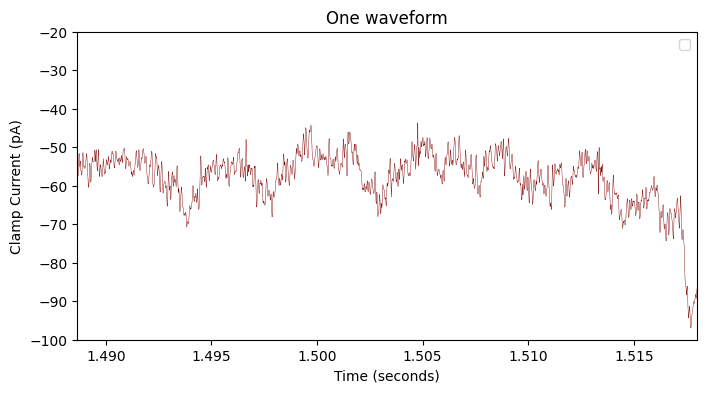

In [164]:

# def plot_ventral_root_waveforms(df, abf, channel=0):

#     annotations["Seconds"] = annotations['On time']*0.001
#     annotations.loc[0:1,"Seconds"]

#     t_0 = annotations.loc[0,"Seconds"] 
#     t_f = annotations.loc[1,"Seconds"]

#     # Loop through pairs of consecutive ventral root bursts
#     for i in range(len(df) - 1):
#         start_time = df.loc[i, 'On time']
#         end_time = df.loc[i + 1, 'On time']

#         # Extract and plot data between start_time and end_time
#         abf.setSweep(sweepNumber=0, channel=channel)  # assumes one long sweep
#         x = abf.sweepX
#         y = abf.sweepY

#         # Get indices for start and end times
#         indices = (x >= start_time) & (x <= end_time)

#         plt.figure(figsize=(10, 3))
#         plt.plot(x[indices], y[indices], color='maroon', linewidth=1.5)
#         plt.title(f"Burst {i+1}: {start_time:.2f}s to {end_time:.2f}s")
#         plt.xlabel("Time (s)")
#         plt.ylabel(abf.sweepLabelY)
#         plt.ylim([-211, 140])
#         plt.tight_layout()
#         plt.show()


# fig = plt.figure(figsize=(8, 4))

# # plot the first channel
# abf.setSweep(sweepNumber=0, channel=0)
# plt.plot(abf.sweepX, abf.sweepY,linewidth = 0.3,color='maroon')

# # decorate the plot
# plt.title("One waveform")
# plt.ylabel(abf.sweepLabelY)
# plt.xlabel(abf.sweepLabelX)
# plt.axis([annotations.loc[0,"Seconds"], annotations.loc[1,"Seconds"],-100, -20]) # x bound, y bound
# plt.legend()
# plt.show()

In [172]:
def plot_one_waveform2(abf, t_0, t_f, ch=0, label=None):
    '''
    Plots a segment of the waveform between t_0 and t_f on the current figure
    '''
    abf.setSweep(sweepNumber=0, channel=ch)
    
    x = abf.sweepX
    y = abf.sweepY

    idx_start = np.searchsorted(x, t_0)
    idx_end = np.searchsorted(x, t_f)

    x_seg = x[idx_start:idx_end]
    y_seg = y[idx_start:idx_end]

    plt.plot(x_seg, y_seg, linewidth=0.5, label=label)


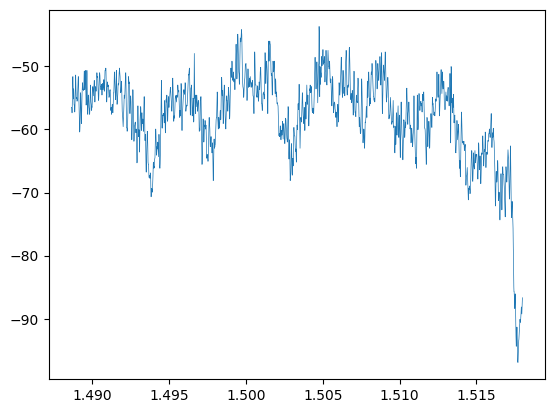

In [176]:
plot_one_waveform2(abf, t_0, t_f, ch=0, label=None)

In [169]:
def plot_waveforms_subplots(df, abf, ch=0):
    df = add_seconds(df)
    num_waveforms = len(df) - 1

    fig, axes = plt.subplots(num_waveforms, 1, figsize=(10, 2 * num_waveforms), sharex=False)
    
    if num_waveforms == 1:
        axes = [axes]  # Ensure axes is always iterable

    for i in range(num_waveforms):
        t_0 = df.loc[i, 'Seconds']
        t_f = df.loc[i + 1, 'Seconds']

        abf.setSweep(sweepNumber=0, channel=ch)
        x = abf.sweepX
        y = abf.sweepY

        idx_start = np.searchsorted(x, t_0)
        idx_end = np.searchsorted(x, t_f)

        x_seg = x[idx_start:idx_end]
        y_seg = y[idx_start:idx_end]

        axes[i].plot(x_seg, y_seg, color='maroon', linewidth=0.5)
        axes[i].set_ylabel(abf.sweepLabelY)
        axes[i].set_title(f"Burst {i + 1}: {t_0:.2f}s to {t_f:.2f}s")
        axes[i].grid(True)

    axes[-1].set_xlabel(abf.sweepLabelX)
    fig.tight_layout()
    plt.show()


In [177]:
import numpy as np
import matplotlib.pyplot as plt

def plot_all_waveforms_stacked(df, abf, ch=0, stdnum=6):
    """
    Plots all waveforms in stacked subplots using time windows from the dataframe.
    """
    df = add_seconds(df)
    num_plots = len(df) - 1

    fig, axes = plt.subplots(num_plots, 1, figsize=(10, 2.5 * num_plots), sharex=False)
    
    if num_plots == 1:
        axes = [axes]  # ensure axes is always iterable

    for i in range(num_plots):
        t_0 = df.loc[i, 'Seconds']
        t_f = df.loc[i + 1, 'Seconds']

        abf.setSweep(sweepNumber=0, channel=ch)
        x = abf.sweepX
        y = abf.sweepY

        idx_start = np.searchsorted(x, t_0)
        idx_end = np.searchsorted(x, t_f)

        x_seg = x[idx_start:idx_end]
        y_seg = y[idx_start:idx_end]

        y_min, y_max = get_std_range(y_seg, stdnum)

        axes[i].plot(x_seg, y_seg, linewidth=0.3, color='maroon')
        axes[i].set_title(f'Burst {i + 1}: {t_0:.2f}s to {t_f:.2f}s')
        axes[i].set_ylabel(abf.sweepLabelY)
        axes[i].set_xlim([t_0, t_f])
        axes[i].set_ylim([y_min, y_max])

    axes[-1].set_xlabel(abf.sweepLabelX)
    fig.tight_layout()
    plt.show()


In [181]:
type(len(df))

int

TypeError: 'tuple' object is not callable

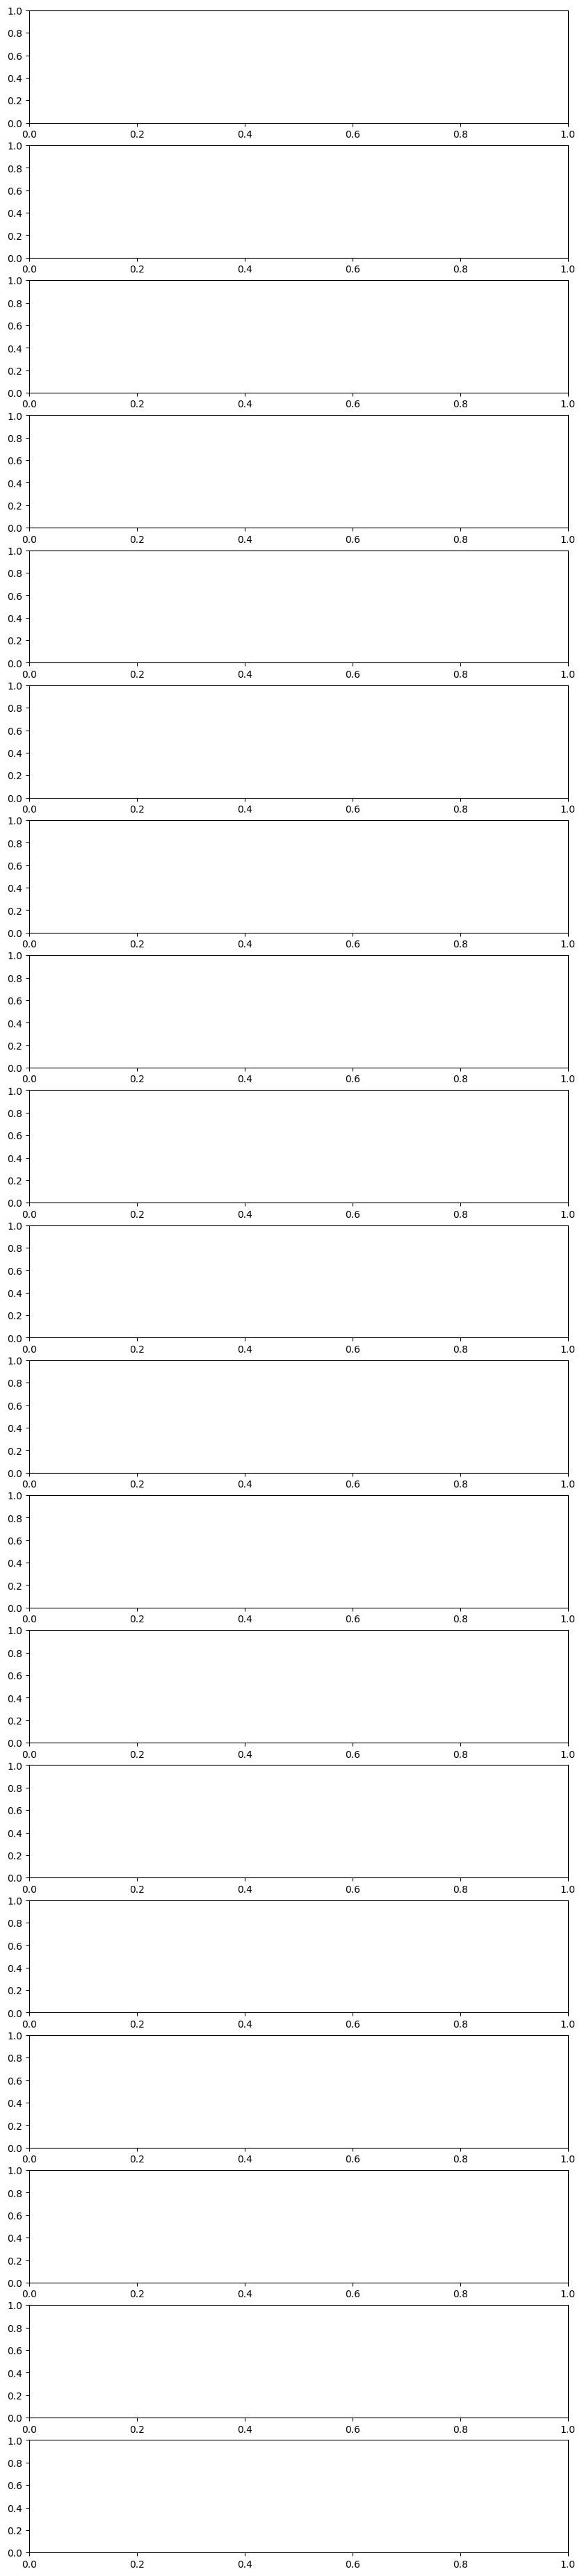

In [182]:
plot_all_waveforms_stacked(df, abf, ch=0)
